In [1]:
# Cleaning WhatsApp log 
import os
import re
import pandas as pd
import numpy as np

# Read file by providing file path.
watsup_file = "C:\\Users\\skman\\Desktop\\Chat_file.txt"




# Read WhatsApp file
if os.path.exists(watsup_file):
        file_data = open(watsup_file,'r', encoding="utf8")
        watsup_content = file_data.read()

# Get date
date_regex= re.compile(r'^(\d{1,2}\/\d{1,2}\/\d{2}, \d{1,2}:\d{2}) - ([^:]+): (.+)$')
date=date_regex.findall(watsup_content)

# Get time
time_regex=re.compile(r'^(\d{1,2}:\d{2} AM|PM)')
time=time_regex.findall(watsup_content)

# Get Users
user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(watsup_content)

# Get Message
message_regex=re.compile(r'([^:]+):?$')
me_regex=re.compile(r"(\n)(?<=)(\d+/\d+/\d+)(.*)")
mess=me_regex.findall(watsup_content)
message = [''.join(message_regex.findall(''.join(msg))).strip() for msg in mess]

# Zip date,time,user,message together
data=[]
for w,x,y,z in zip(date,time,user,message):
    data.append([str(w),str(x),str(y),str(z)])
    
# Create DataFrame from WhatsApp content
df=pd.DataFrame(data,columns=("Date","Time","User","Message"))

# Let's clean our Message
df['Message']=df['Message'].str.replace('\'(.*?): ','')

# Get Year from Date
df['Date'] = pd.to_datetime(df['Date'], format='%M-%d-%y', errors='coerce')

df['Year']=df['Date'].dt.year

# Get Month from Date
df['Month']=df['Date'].dt.month

# Get Day from Date
df['Day']=df['Date'].dt.day

# Get Hours of the Day

#df['Time'] = pd.to_datetime(df['Time'])
df['Hours']=df.Time.apply(lambda x: x.hour)

# Message words
df['Words'] = df['Message'].str.strip().str.split('[\W_]+')

# Word length
df['Word Length'] = df['Words'].apply(len)-2

# Get the Length of Message
df['Message Characters'] = df['Message'].map(str).apply(len)-3

# Get Media shared in the Message
df['Media']=df['Message'].str.contains('<Media omitted>')

# Save the DataFrame to a csv file
df.to_csv("whatsapp.csv")

In [3]:
print(df.columns)

Index(['Date', 'Time', 'User', 'Message', 'Year', 'Month', 'Day', 'Hours',
       'Words', 'Word Length', 'Message Characters', 'Media'],
      dtype='object')


In [5]:
print(df.shape)

(0, 12)


In [7]:
import os
import re
import pandas as pd

# Read file by providing file path
watsup_file = "C:\\Users\\skman\\Desktop\\Chat_file.txt"

# Read WhatsApp file
if os.path.exists(watsup_file):
    with open(watsup_file, 'r', encoding="utf8") as file_data:
        watsup_content = file_data.read()

# Define regex pattern to capture date, time, user, and message
pattern = re.compile(r'(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}\s*[APM]{2}) - ([^:]+): (.+)')
matches = pattern.findall(watsup_content)

# Create a DataFrame from the matches
data = []
for match in matches:
    date_time_str, user, message = match
    data.append([date_time_str, user, message])

df = pd.DataFrame(data, columns=["Date Time", "User", "Message"])

# Convert 'Date Time' to datetime
df['Date Time'] = pd.to_datetime(df['Date Time'], format='%m/%d/%y, %I:%M %p', errors='coerce')

# Extract Year, Month, Day, and Time
df['Year'] = df['Date Time'].dt.year
df['Month'] = df['Date Time'].dt.month
df['Day'] = df['Date Time'].dt.day
df['Time'] = df['Date Time'].dt.time
df['Hour'] = df['Date Time'].dt.hour

# Clean the Message column
df['Message'] = df['Message'].str.replace(r'\'(.*?): ', '', regex=True)

# Message words
df['Words'] = df['Message'].str.strip().str.split('[\W_]+')

# Word length
df['Word Length'] = df['Words'].apply(len)

# Get the Length of Message
df['Message Characters'] = df['Message'].map(str).apply(len)

# Get Media shared in the Message
df['Media'] = df['Message'].str.contains('<Media omitted>')

# Save the DataFrame to a csv file
df.to_csv("whatsapp.csv", index=False)

print(df.head(15))


             Date Time       User  \
0  2024-03-24 15:02:00  Sakshi Ee   
1  2024-03-24 15:02:00  Sakshi Ee   
2  2024-03-24 15:02:00  Sakshi Ee   
3  2024-03-24 15:02:00  Sakshi Ee   
4  2024-03-24 15:02:00  Sakshi Ee   
5  2024-03-24 15:49:00   Anshu Ee   
6  2024-03-24 15:50:00   Anshu Ee   
7  2024-03-24 16:16:00  Sakshi Ee   
8  2024-03-24 16:16:00  Sakshi Ee   
9  2024-03-24 16:16:00   Anshu Ee   
10 2024-03-24 16:17:00  Sakshi Ee   
11 2024-03-24 16:17:00  Sakshi Ee   
12 2024-03-24 16:17:00  Sakshi Ee   
13 2024-03-24 16:17:00  Sakshi Ee   
14 2024-03-24 16:19:00   Anshu Ee   

                                              Message  Year  Month  Day  \
0   https://www.instagram.com/p/C45Bf6VSiBc/?igsh=...  2024      3   24   
1                                    Please like thjs  2024      3   24   
2                                              Baccho  2024      3   24   
3                                     <Media omitted>  2024      3   24   
4                               

In [9]:
print(df.shape)

(1037, 12)


In [11]:
df['User'].unique()

array(['Sakshi Ee', 'Anshu Ee', 'Vanshika', 'SURBHI CHOUDHARY', 'Shruti'],
      dtype=object)

In [13]:
print(df.describe())

                           Date Time    Year        Month          Day  \
count                           1037  1037.0  1037.000000  1037.000000   
mean   2024-05-14 16:31:07.116683008  2024.0     4.830280    18.944069   
min              2024-03-24 15:02:00  2024.0     3.000000     1.000000   
25%              2024-04-22 15:03:00  2024.0     4.000000    13.000000   
50%              2024-05-18 13:23:00  2024.0     5.000000    20.000000   
75%              2024-05-28 23:00:00  2024.0     5.000000    24.000000   
max              2024-07-03 22:51:00  2024.0     7.000000    30.000000   
std                              NaN     0.0     0.731351     6.985558   

              Hour  Word Length  Message Characters  
count  1037.000000  1037.000000         1037.000000  
mean     15.816779     3.642237           15.453230  
min       0.000000     1.000000            1.000000  
25%      13.000000     2.000000            6.000000  
50%      15.000000     4.000000           15.000000  
75%      

In [19]:
users=df.groupby('User')['User'].count()
print(users)

User
Anshu Ee            120
SURBHI CHOUDHARY    226
Sakshi Ee           473
Shruti               70
Vanshika            148
Name: User, dtype: int64


In [21]:
year=df.groupby('Year')['Year'].count()
print(year)

Year
2024    1037
Name: Year, dtype: int64


In [23]:
month =df.groupby(['Month'])['Month'].count()
print(month)

Month
3     20
4    319
5    516
6    181
7      1
Name: Month, dtype: int64


In [25]:
month=df.groupby(['Year','Month'])['Month'].count()
print(month)

Year  Month
2024  3         20
      4        319
      5        516
      6        181
      7          1
Name: Month, dtype: int64


In [27]:
char_length=df.groupby(['User'])['Message Characters'].sum()
print(char_length)

User
Anshu Ee            2799
SURBHI CHOUDHARY    4112
Sakshi Ee           6023
Shruti              1311
Vanshika            1780
Name: Message Characters, dtype: int64


In [29]:
media=df.groupby(['Media'])['Media'].sum()
print(media)

Media
False      0
True     270
Name: Media, dtype: int64


In [31]:
media_df=df[df['Media']==True]
media_per_user=media_df.groupby(['User','Media'])['Media'].count()
print(media_per_user)

User              Media
Anshu Ee          True     52
SURBHI CHOUDHARY  True     57
Sakshi Ee         True     85
Shruti            True     19
Vanshika          True     57
Name: Media, dtype: int64


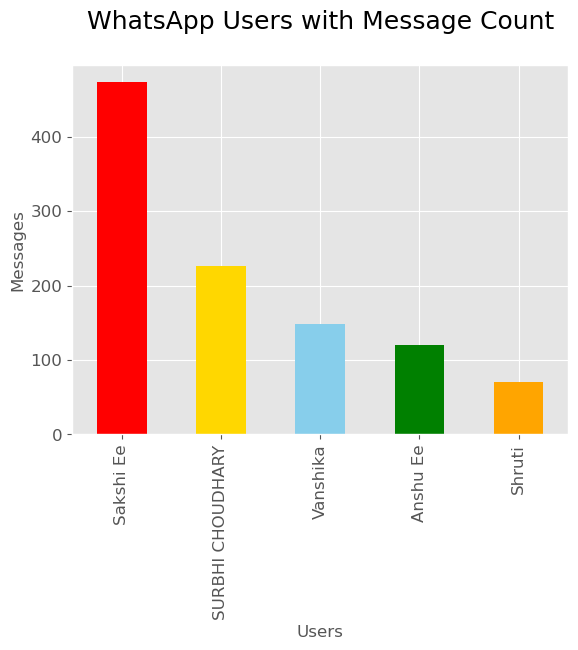

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
 
users=df.groupby('User')['User'].count().nlargest(15)
 
def bar_chart(users):
    ax = users.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("WhatsApp Users with Message Count\n", fontsize=18)
    ax.set_xlabel("Users", fontsize=12)
    ax.set_ylabel("Messages", fontsize=12)
    plt.show()
    #plt.savefig('whatsapp.png')
 
bar_chart(users)

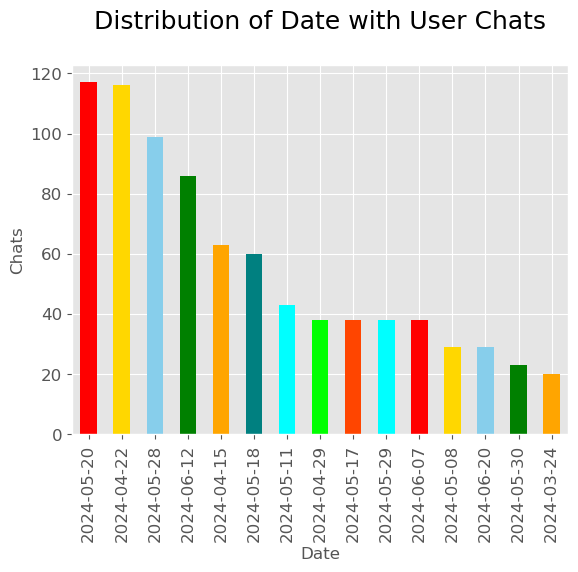

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

days=df.groupby('Date')['Date'].count().nlargest(15)
def date_users_bar_chart(date):
    ax = date.plot(kind='bar', color = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12)
    ax.set_title("Distribution of Date with User Chats\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

days_count=days[0:]
date_users_bar_chart(days_count)

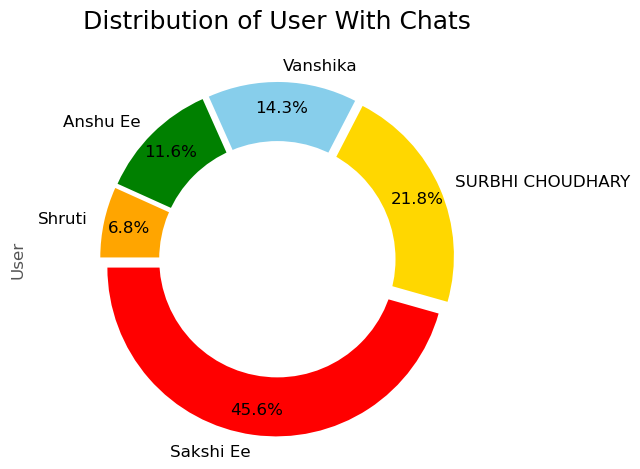

In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

user=df.groupby('User')['User'].count().nlargest(15)

def user_chat_pie(user):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(user)):
        explodex.append(0.05)
    ax = user.plot(kind='pie', colors = ['red','gold','skyblue','green','orange','teal','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85, explode = explodex)
    inner_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(inner_circle)
    ax.axis('equal')  
    ax.set_title("Distribution of User With Chats\n", fontsize=18)
    plt.tight_layout()
    plt.show()
   #plt.savefig('pie.png',bbox_inches='tight')
user_chat_pie(user)

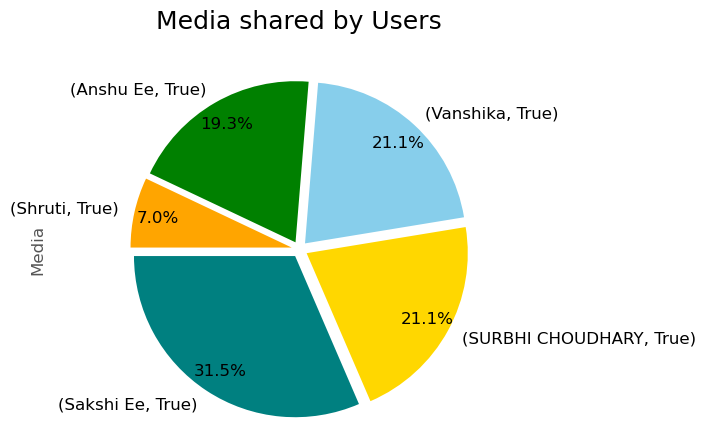

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

media_df=df[df['Media']==True]
media_per_user_group=media_df.groupby(['User','Media'])['Media'].count().nlargest(15)

def media_shared_pie(media_per_user_group):
    fig, ax = plt.subplots()
    explodex = []
    for i in np.arange(len(media_per_user_group)):
        explodex.append(0.05)
    ax = media_per_user_group.plot(kind='pie', colors = ['teal','gold','skyblue','green','orange','red','cyan','lime','orangered','aqua'], fontsize=12, autopct='%1.1f%%', startangle=180, pctdistance=0.85,explode=explodex)
    ax.axis('equal')  
    ax.set_title("Media shared by Users\n", fontsize=18)
    plt.show()

media_shared_pie(media_per_user_group)

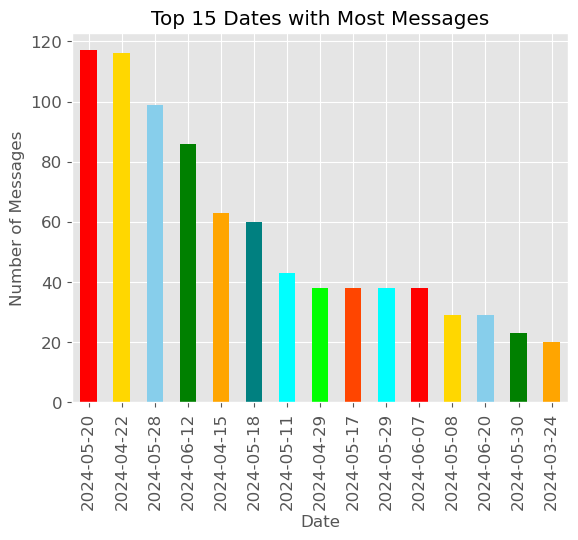

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Extract the date part from 'Date Time'
df['Date'] = df['Date Time'].dt.date

# Group by 'Date' and count the occurrences
days = df.groupby('Date')['Date'].count().nlargest(15)

#print(days)

# Plotting the bar chart
def date_users_bar_chart(date):
    ax = date.plot(kind='bar', color=['red', 'gold', 'skyblue', 'green', 'orange', 'teal', 'cyan', 'lime', 'orangered', 'aqua'], fontsize=12)
    plt.title('Top 15 Dates with Most Messages')
    plt.xlabel('Date')
    plt.ylabel('Number of Messages')
    plt.show()

# Call the function with the grouped data
date_users_bar_chart(days)


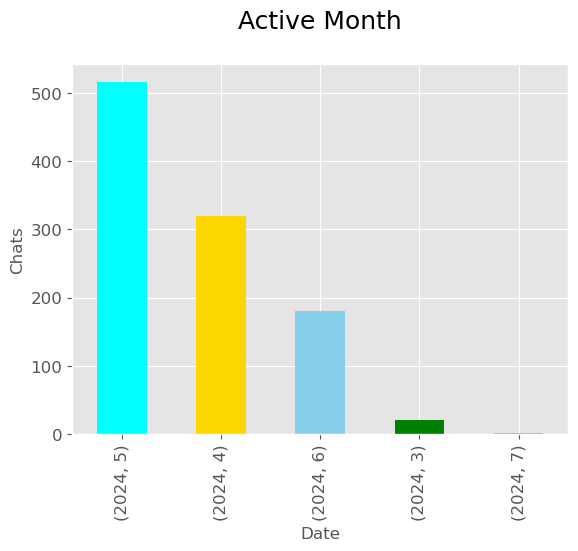

In [45]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_month=df.groupby(['Year','Month'])['Month'].count().nlargest(15)

def active_month_bar_chart(active_month):
    ax = active_month.plot(kind='bar', color = ['aqua','gold','skyblue','green','orange','red','cyan','lime','orangered','teal'], fontsize=12)
    ax.set_title("Active Month\n", fontsize=18)
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()

active_month_bar_chart(active_month)

In [49]:
hours = df.groupby('Hour')['Hour'].count()
print(hours)

Hour
0      41
5       1
7       2
8       8
9      41
10      8
11     14
12     46
13    134
14    124
15    109
16     40
17     50
18     66
19     73
20     83
21     30
22    145
23     22
Name: Hour, dtype: int64


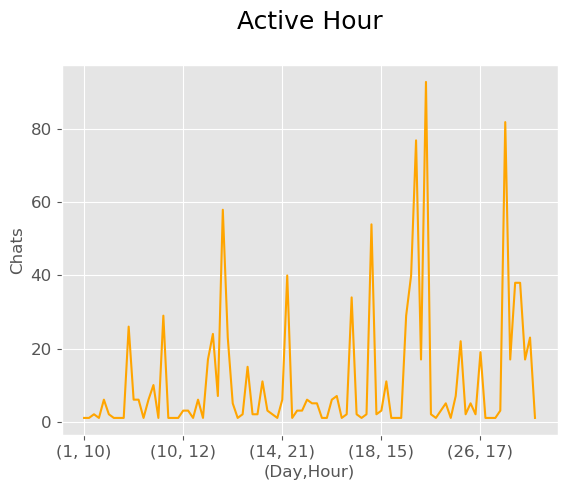

In [51]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

active_hour_line_group=df.groupby(['Day','Hour'])['Hour'].count()
def active_hour_line_chart(active_hour_line_group):
    ax = active_hour_line_group.plot(kind='line',color='orange', fontsize=12)
    ax.set_title("Active Hour\n", fontsize=18)
    ax.set_xlabel("(Day,Hour)", fontsize=12)
    ax.set_ylabel("Chats", fontsize=12)
    plt.show()
active_hour_line_chart(active_hour_line_group)